<a href="https://colab.research.google.com/github/walkingjason/CSCI4962/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
## part1

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings
import time
import os
from IPython.display import clear_output
from google.colab import drive
warnings.filterwarnings("ignore")

from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import Sequence
import albumentations

In [4]:
! pip install kaggle
drive.mount('/content/drive', force_remount=True)
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/datasets/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
# https://www.kaggle.com/datasets/chetankv/dogs-cats-images
! kaggle datasets download chetankv/dogs-cats-images
clear_output()

In [5]:
!unzip dogs-cats-images.zip -d .
clear_output()

In [6]:
test = "./dog vs cat/dataset/test_set"
train = "./dog vs cat/dataset/training_set"
train_dog = (train + "/dogs")
train_cat = (train + "/cats")
test_dog = (test + "/dogs")
test_cat = (test + "/cats")

print(len(os.listdir(train_cat)))
print(len(os.listdir(train_dog)))
print(len(os.listdir(test_cat)))
print(len(os.listdir(test_dog)))

4000
4000
1000
1000


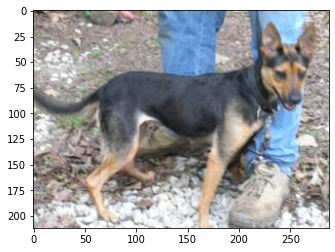

In [5]:
img = load_img(train_dog + "/dog.1111.jpg")
plt.imshow(img)

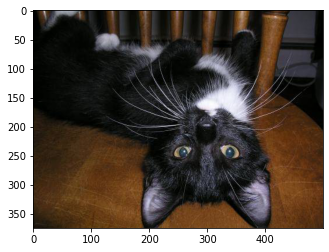

In [ ]:
img = load_img(train_cat + "/cat.2222.jpg")
plt.imshow(img)

In [7]:
data_generator = ImageDataGenerator(rescale = 1./250,zoom_range = 0.2)
batch_size = 8
train_data = data_generator.flow_from_directory(directory = train, batch_size=batch_size, shuffle=True, target_size = (150, 150), class_mode  = 'binary')                  
test_data = data_generator.flow_from_directory(directory = test, batch_size=batch_size, shuffle=True, target_size = (150, 150), class_mode  = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
train_data.image_shape


(150, 150, 3)

In [9]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = train_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = len(set(train_data.classes)), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

The model is consist of several Conv layers and MaxPooling layers. The Conv layers have increasing filter size. All Conv layers have the exact same kerner size of (3, 3). All of them have activation function 'relu', and their input shapes are the same as the shape of the training data images. One layer of MaxPooling follows each Conv2D layer. They all have a fixed pool size of (2, 2). A flatten layer is added to flatten to create a single feature vector for the final Dense layer. And finally, the Dense layer is added for the ultimate classification. It has activation function 'softmax'. The model is compiled with optimizer 'adam', the loss function is 'sparse categorical crossentropy', and the metrics used for evaluation is accuracy.

In [ ]:
start = time.time()
log = model.fit_generator(train_data, steps_per_epoch = 1000, epochs = 30, validation_data = test_data)
end = time.time()
print('Time spent: '+str(end-start))

Epoch 1/30
1000/1000 [==============================] - 85s 84ms/step - loss: 0.6915 - accuracy: 0.5296 - val_loss: 0.6868 - val_accuracy: 0.5490
Epoch 2/30
1000/1000 [==============================] - 80s 80ms/step - loss: 0.6443 - accuracy: 0.6299 - val_loss: 0.6257 - val_accuracy: 0.6630
Epoch 3/30
1000/1000 [==============================] - 84s 84ms/step - loss: 0.5825 - accuracy: 0.6961 - val_loss: 0.5741 - val_accuracy: 0.6935
Epoch 4/30
1000/1000 [==============================] - 80s 80ms/step - loss: 0.5151 - accuracy: 0.7477 - val_loss: 0.5365 - val_accuracy: 0.7440
Epoch 5/30
1000/1000 [==============================] - 80s 80ms/step - loss: 0.4804 - accuracy: 0.7692 - val_loss: 0.5115 - val_accuracy: 0.7490
Epoch 6/30
1000/1000 [==============================] - 80s 80ms/step - loss: 0.4458 - accuracy: 0.7937 - val_loss: 0.4745 - val_accuracy: 0.7830
Epoch 7/30
1000/1000 [==============================] - 89s 89ms/step - loss: 0.4137 - accuracy: 0.8123 - val_loss: 0.4357 -

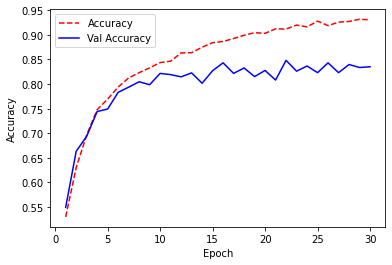

In [ ]:
training_loss = log.history['accuracy']
val_loss = log.history['val_accuracy']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

## Part 2

In [7]:
v3 = InceptionV3()

96112376/96112376 [==============================] - 3s 0us/step


In [8]:
v3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
start = time.time()
log = v3.fit_generator(train_data, steps_per_epoch = 1000, epochs = 30, validation_data = test_data)
end = time.time()
print('Time spent: '+str(end-start))

Epoch 1/30
1000/1000 [==============================] - 120s 103ms/step - loss: 0.5544 - accuracy: 0.7571 - val_loss: 0.5701 - val_accuracy: 0.7060
Epoch 2/30
1000/1000 [==============================] - 105s 105ms/step - loss: 0.4363 - accuracy: 0.8048 - val_loss: 50.1742 - val_accuracy: 0.5940
Epoch 3/30
1000/1000 [==============================] - 102s 102ms/step - loss: 0.3708 - accuracy: 0.8382 - val_loss: 5.2066 - val_accuracy: 0.6615
Epoch 4/30
1000/1000 [==============================] - 102s 102ms/step - loss: 0.3642 - accuracy: 0.8438 - val_loss: 1.2943 - val_accuracy: 0.7310
Epoch 5/30
1000/1000 [==============================] - 103s 103ms/step - loss: 0.3611 - accuracy: 0.8462 - val_loss: 21.7834 - val_accuracy: 0.6685
Epoch 6/30
1000/1000 [==============================] - 100s 100ms/step - loss: 0.3430 - accuracy: 0.8594 - val_loss: 0.3503 - val_accuracy: 0.8650
Epoch 7/30
1000/1000 [==============================] - 106s 106ms/step - loss: 0.2893 - accuracy: 0.8820 - va

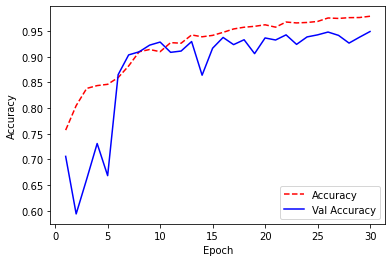

In [9]:
training_loss = log.history['accuracy']
val_loss = log.history['val_accuracy']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

Compare to the stacking of Conv and Maxpooling layers, GoogLeNet's InceptionV3 is able to achieve a higher accuracy. However, it taske more time to train. 

## part 3

In [10]:
import albumentations as A

class AugmentDataGenerator(Sequence):
    def __init__(self, datagen, augment=None):
        self.datagen = datagen
        if augment is None:
            self.augment = A.Compose([])
        else:
            self.augment = augment

    def __len__(self):
        return len(self.datagen)

    def __getitem__(self, x):
        images, *rest = self.datagen[x]
        augmented = []
        for image in images:
            image = self.augment(image=image)['image']
            augmented.append(image)
        return (np.array(augmented), *rest)

train_data_aug = AugmentDataGenerator(train_data, A.Compose([
    A.RandomResizedCrop(256, 256),
    A.Flip(),
    A.Rotate(),
]))

In [11]:
start = time.time()
log_aug = model.fit_generator(train_data, steps_per_epoch = 1000, epochs = 30, validation_data = test_data)
end = time.time()
print('Time spent: '+str(end-start))

Epoch 1/30
1000/1000 [==============================] - 89s 81ms/step - loss: 0.6822 - accuracy: 0.5485 - val_loss: 0.7242 - val_accuracy: 0.5965
Epoch 2/30
1000/1000 [==============================] - 79s 79ms/step - loss: 0.6415 - accuracy: 0.6388 - val_loss: 0.6133 - val_accuracy: 0.6715
Epoch 3/30
1000/1000 [==============================] - 80s 80ms/step - loss: 0.5934 - accuracy: 0.6879 - val_loss: 0.5870 - val_accuracy: 0.7045
Epoch 4/30
1000/1000 [==============================] - 79s 79ms/step - loss: 0.5553 - accuracy: 0.7150 - val_loss: 0.5546 - val_accuracy: 0.7270
Epoch 5/30
1000/1000 [==============================] - 79s 79ms/step - loss: 0.5185 - accuracy: 0.7381 - val_loss: 0.5487 - val_accuracy: 0.7235
Epoch 6/30
1000/1000 [==============================] - 79s 79ms/step - loss: 0.4901 - accuracy: 0.7656 - val_loss: 0.4816 - val_accuracy: 0.7785
Epoch 7/30
1000/1000 [==============================] - 79s 79ms/step - loss: 0.4650 - accuracy: 0.7837 - val_loss: 0.4514 -

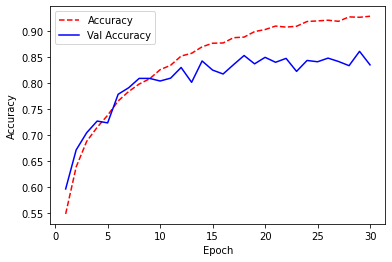

In [12]:
training_loss = log_aug.history['accuracy']
val_loss = log_aug.history['val_accuracy']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

Using augmented pictures for training is getting similar results comparing to using the original pictures. This phenomenon is possibly due to the specific characteristics of the selected images.

# Task2
## Part 1

In [55]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [56]:
# Dataset: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist
(train_images, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()

In [15]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

In [57]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

In [58]:
train_size = 60000
batch_size = 32
test_size = 10000

In [59]:
train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

In [60]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [61]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [62]:
epochs = 50
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

In [63]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [64]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

Epoch: 50, Test set ELBO: -186.45343017578125, time elapse for current epoch: 5.014179229736328


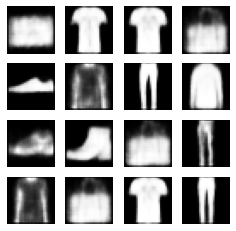

In [65]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, test_sample)

In [66]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

(-0.5, 287.5, 287.5, -0.5)

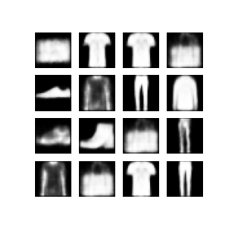

In [67]:
plt.imshow(display_image(epoch))
plt.axis('off')  # Display images

# Part 2

In [27]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [28]:
(train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]
BUFFER_SIZE = 60000
BATCH_SIZE = 256
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [29]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

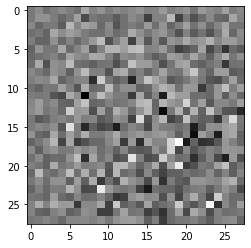

In [30]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [31]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [32]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00206994]], shape=(1, 1), dtype=float32)


In [33]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [44]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [45]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)
  

In [46]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

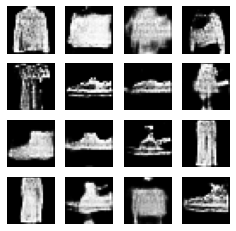

In [47]:
train(train_dataset, EPOCHS)

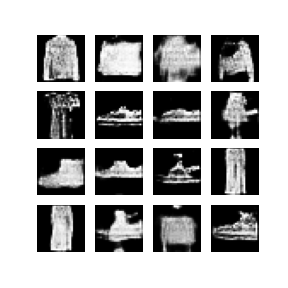

In [48]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))
display_image(EPOCHS)

In [49]:
! pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-y1njk1q2
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-y1njk1q2



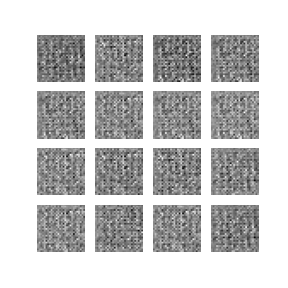

In [50]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)